In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
sns.set(style="darkgrid")
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from dython.nominal import associations

%matplotlib inline

In [2]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         path=os.path.join(dirname, filename)
#         if 'train' in path:
#             training_path=path
#         elif 'test' in path:
#             test_path=path

In [3]:
training_path = 'train.csv'
test_path = 'test.csv'

In [4]:
train_ori = pd.read_csv(training_path)
test = pd.read_csv(test_path)

In [5]:
# Creating validation set
train, val = train_test_split(train_ori, test_size=0.2, random_state=42)
train.shape, val.shape

((1168, 81), (292, 81))

### 1. **Exploratory Data Analysis**

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [7]:
train.drop(columns=['Id'], inplace = True)
test.drop(columns=['Id'], inplace = True)
val.drop(columns=['Id'], inplace = True)

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.849315,42.531862,20.0,20.00,50.0,70.00,190.0
LotFrontage,951.0,70.343849,24.897021,21.0,59.00,70.0,80.00,313.0
LotArea,1168.0,10689.642123,10759.366198,1300.0,7587.25,9600.0,11700.00,215245.0
OverallQual,1168.0,6.121575,1.367619,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.584760,1.116062,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1970.965753,30.675495,1872.0,1953.00,1972.0,2001.00,2010.0
YearRemodAdd,1168.0,1984.897260,20.733955,1950.0,1966.00,1994.0,2004.00,2010.0
MasVnrArea,1162.0,103.771945,173.032238,0.0,0.00,0.0,166.00,1378.0
BsmtFinSF1,1168.0,446.023973,459.070977,0.0,0.00,384.5,721.00,5644.0
BsmtFinSF2,1168.0,45.152397,158.217499,0.0,0.00,0.0,0.00,1127.0


In [9]:
train.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

Features numéricas contínuas:
- 'LotFrontage': Pés lineares da rua conectados à propriedade;
- 'LotArea': Área do lote;
- 'MasVnrArea': Área de alvenaria;
- 'BsmtFinSF1': Área acabada do porão (do primeiro tipo);
- 'BsmtFinSF2': Área acabada do porão (do segundo tipo, se mais de um);
- 'BsmtUnfSF': Área não acabada do porão;
- 'TotalBsmtSF': Área total do porão;
- '1stFlrSF': Área do primeiro andar;
- '2ndFlrSF': Área do segundo andar;
- 'LowQualFinSF': Área com acabamento de baixa qualidade (todos os andares);
- 'GrLivArea': Área útil acima do nível solo;
- 'GarageArea': Área da garagem;
- 'WoodDeckSF': Área do deck de madeira;
- 'OpenPorchSF': Área de varanda aberta;
- 'EnclosedPorch': Área de varanda fechada;
- '3SsnPorch': Área da varanda de três temporadas;
- 'ScreenPorch': Área da tela da varanda;
- 'PoolArea': Área da piscina;
- 'MiscVal': Valor monetário de características diversas não incluídas em outras categorias;
- 'GarageYrBlt': Ano de construção da garagem;

Features numéricos discretos:
- 'BsmtFullBath': Banheiros completos no porão;
- 'BsmtHalfBath': Lavabos no porão;
- 'FullBath': Banheiros completos acima do nível do solo;
- 'HalfBath': Lavabos completos acima do nível do solo;
- 'BedroomAbvGr': Quartos acima do nível do solo (não inclui quartos no subsolo);
- 'KitchenAbvGr': Cozinhas acima do nível do solo;
- 'TotRmsAbvGrd': Total de cômodos acima do nível do solo (não inclui banheiros);
- 'Fireplaces': Número de lareiras;
- 'GarageCars': Capacidade da garagem (número de carros);
- 'YearBuilt': Ano de construção da casa;
- 'YearRemodAdd': Ano da reforma da casa (mesma do ano da construção de não houver);
- 'MoSold': Mês de venda;
- 'YrSold': Ano de venda;

Features categóricos ordinais:
- 'LotShape': Formato geral do lote (regular, ligeiramente irregular, moderadamente irregular, irregular);
- 'Utilities': Utilidades disponíveis (de apenas eletricidade a todas);
- 'LandSlope': Inclinação do terreno (3 níveis);
- 'OverallQual': Qualidade geral da casa (de 0 a 10);
- 'OverallCond': Condições gerais da cada (de 0 a 10);
- 'ExterQual': Qualidade do material no exterior (5 níveis);
- 'ExterCond': Avaliação a condição atual do material no exterior (5 níveis);
- 'BsmtQual': Avaliação a altura do porão (5 níveis);
- 'BsmtCond': Avaliação do estado geral do porão (5 níveis);
- 'BsmtFinType1': Classificação da área acabada do porão (6 níveis + NA);
- 'BsmtFinType2': Classificação da área acabada do porão (para o segundo tipo, se mais de um) (6 níveis + NA);
- 'BsmtExposure': Avaliação da exposição externa do porão;
- 'HeatingQC': Qualidade e condição do aquecimento (5 níveis);
- 'KitchenQual': Qualidade da cozinha (5 níveis);
- 'Functional': Funcionalidade inicial (presuma típica, a menos que as deduções sejam garantidas) (8 níveis);
- 'FireplaceQu': Qualidade da lareira (5 níveis + NA);
- 'GarageFinish': Estado do acabamento interior da garagem (acabado, mal acabado, não acabado, sem garagem, NA);
- 'GarageQual': Qualidade da garagem (5 níveis + NA);
- 'GarageCond': Condição da garagem (5 níveis + NA);
- 'PavedDrive': Pavimento da pista até a garagem (pavimentado, parcialmente pavimentado, sem pavimento/cascalho);
- 'PoolQC': Qualidade da piscina (4 níveis + NA);
- 'Fence': Qualidade da cerca (4 níveis + NA);

Features categóricos nominais (24):
- 'Street': Tipo de estrada de acesso à propriedade (pavimentada ou de cascalho);
- 'Alley': Tipo de acesso à propriedade (pavimentada, de cascalho ou NA);
- 'MSSubClass': Classificação do tipo de imóvel;
- 'MSZoning': Classificação geral do zoneamento (Comercial, Agricultural, Residencial de média densidade, etc);
- 'LandContour': Tipo de nivelamento do terreno da propriedade;
- 'LotConfig': Configuração do lote (ex: esquina, dentro do lote, etc.);
- 'Neighborhood': Bairro;
- 'Condition1': Proximidade a alguma via específica (ex: Adjacente à Ferrovia Norte-Sul);
- 'Condition2': Idem a anterior, se mais de uma;
- 'BldgType': Tipo de moradia (ex: duplex, unidade interna da casa geminada, etc.);
- 'HouseStyle': Estilo de moradia (ex: casa térrea, sobrado, etc.). Semelhante a MSSubClass, mas menos detalhado;
- 'RoofStyle': Tipo de telhado;
- 'RoofMatl': Material do telhado;
- 'Exterior1st': Tipo de acabamento exterior;
- 'Exterior2nd': Idem a anterior, se mais de um;
- 'MasVnrType': Tipo da cobertura da alvenaria;
- 'Foundation': Tipo de fundação;
- 'Heating': Tipo de aquecimento;
- 'CentralAir': Ar condicionado central (sim ou não);
- 'Electrical': Sistema elétrico;
- 'GarageType': Localização da garagem em relação a casa;
- 'MiscFeature': Características diversas não incluídas em outras categorias;
- 'SaleType': Tipo de venda (tipo de garantia, tipo de contrato);
- 'SaleCondition': Condição de venda (ex: normal, venda entre membros de família, etc.).

In [10]:
continuous = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea',
                'MiscVal']

discrete = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 
            'MoSold', 'YrSold']

cat_ordinal = [ 'LotShape', 'Utilities', 'LandSlope','OverallQual','OverallCond','ExterQual','ExterCond',
               'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','HeatingQC','KitchenQual',
               'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence',]

cat_nominal = [ 'Street', 'Alley', 'MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 
               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
               'MiscFeature', 'SaleType', 'SaleCondition',]

In [11]:
quantitative = continuous + discrete
qualitative = cat_ordinal + cat_nominal
len(quantitative), len(qualitative)

(33, 46)

In [12]:
train[qualitative] = train[qualitative].astype('category')

### Missing Values

Lets see the correlation before handling missing values

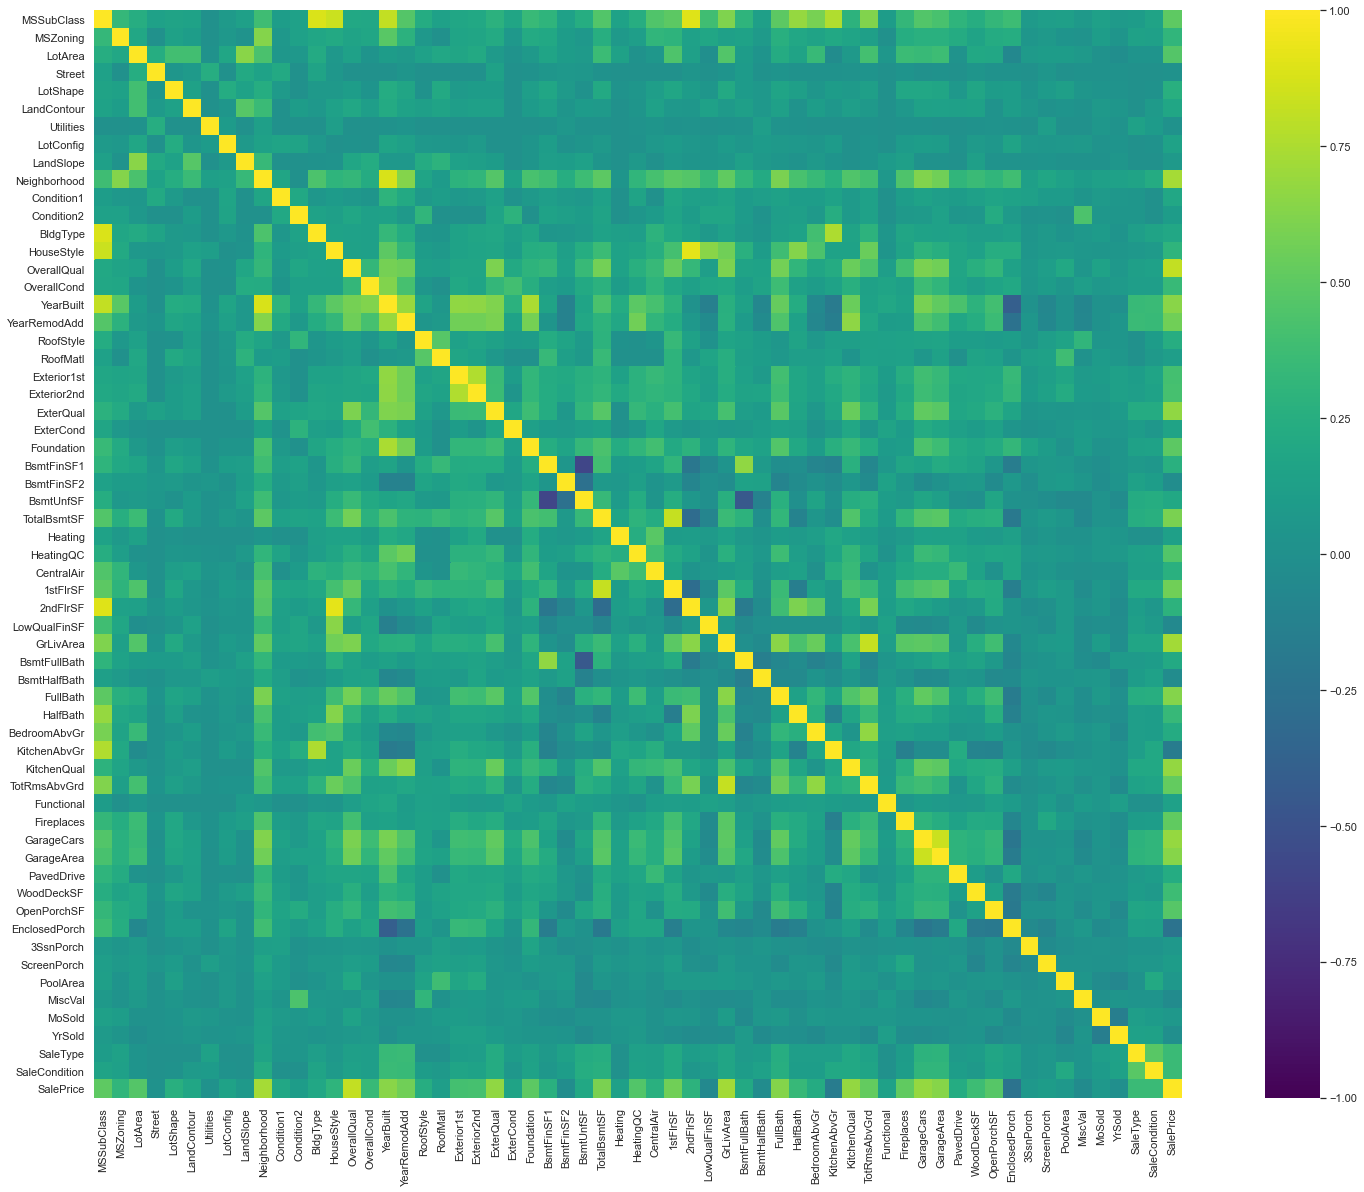

In [26]:
result = associations(train, num_num_assoc = 'spearman', nan_strategy='drop_features', annot= False, figsize=(30, 20), cmap='viridis')

In [14]:
def handle_missing(df, features):
    missing = df[features].isna().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True, ascending=False)
    
    chart = sns.barplot(x=missing.index, y=missing.values)
    _ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    print('Percentile of Missing Values')
    print(((missing / df.shape[0]) * 100))
    return ((missing / df.shape[0]) * 100)

Percentile of Missing Values
PoolQC          99.486301
MiscFeature     96.061644
Alley           93.664384
Fence           80.051370
FireplaceQu     46.832192
LotFrontage     18.578767
GarageCond       5.479452
GarageQual       5.479452
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
BsmtExposure     2.397260
BsmtFinType2     2.397260
BsmtFinType1     2.397260
BsmtCond         2.397260
BsmtQual         2.397260
MasVnrType       0.513699
MasVnrArea       0.513699
Electrical       0.085616
dtype: float64


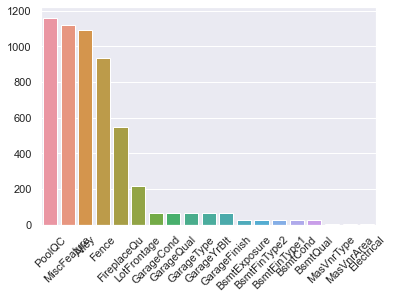

In [15]:
missing = handle_missing(train, quantitative + qualitative)

Checking outliers

In [53]:
missing_num = [a for a in missing.index.values if train[a].dtype == 'float64']

In [39]:
def plot_outliers(feature_list, df, single_plot_w=1.5 * 3.8, single_plot_h=3.8):
    m, n = len(feature_list), 1
    fig, ax = plt.subplots(m, n, figsize=(n * single_plot_w, m * single_plot_h))
#     print(ax)
    for i, feature in enumerate(feature_list):
        g = sns.boxplot(x=df[feature], ax=ax[i])       
        g.set_yticklabels(['{:,.0f}'.format(y) + 'K' for y in g.get_yticks()/1000])

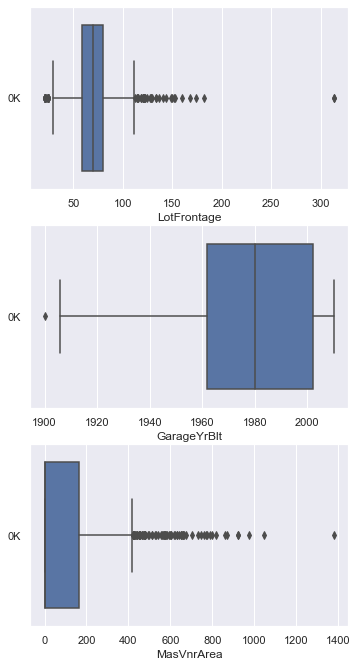

In [54]:
plot_outliers(missing_num, train)

In [16]:
# def get_correlation(df_corr, column='SalePrice', threshold=0.5):
#     return df_corr[df_corr[column] > threshold][column].sort_values(ascending=False)

In [17]:
def get_correlation(df, features, column='SalePrice', threshold=0.5):
    variables = features
    df_corr_num = train[variables].corr(method="spearman")
    return df_corr_num[df_corr_num[column] > threshold][column].sort_values(ascending=False)

LotFrontage is the linear feet of street connected to property, it makes sense to be similar in the same neighborhood. So, I am going to replace the missing values of LotFrontage with the median of the LotFrontage of the corresponding neighborhood. I chose the median because there are many outliers in this variable.

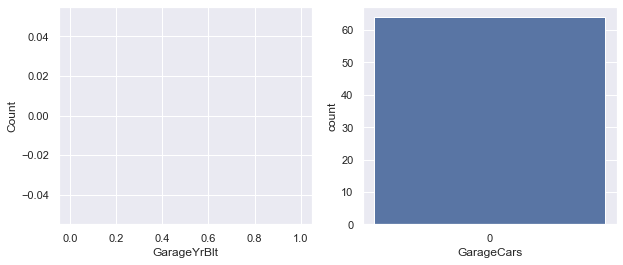

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(train[train['GarageCars'] == 0]['GarageYrBlt'], ax = ax[0])
sns.countplot(train[train['GarageYrBlt'].isna()]['GarageCars'], ax = ax[1])

For the Garage Year Built, we can see there're missing values when the garage was not built yet. So the Garage Capacity (or Number of Cars) is zero and other features related to the garage also have missing values. Maybe the GarageYrBlt is not too relevant for us as we have GarageCars.

The same for Masonry and Basement related features.
Then, I am going to drop features that have missing values for more than 40% of samples. Otherwise, I am going to replace the quantitative features with 0 and qualitative with 'NA', except from 'LotFrontage' as I explained above.

In [57]:
train.groupby("Neighborhood")["LotFrontage"].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    68.0
Edwards    66.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    71.0
NAmes      74.5
NPkVill    24.0
NWAmes     80.0
NoRidge    90.5
NridgHt    91.5
OldTown    60.0
SWISU      60.0
Sawyer     70.5
SawyerW    66.0
Somerst    73.5
StoneBr    53.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [58]:
def clean_data(df, columns):
    for col in columns:
        if col == 'LotFrontage':
            df[col] = df.groupby("Neighborhood")[col].transform(lambda x: x.fillna(x.median()))
        elif col in quantitative:
#             print(col)
            df[col] = df[col].fillna(0)
        else:
            if 'NA' not in train[col].cat.categories:
                df[col] = df[col].cat.add_categories('NA')
            df[col] = df[col].fillna('NA')
    return df

In [59]:
columns_to_drop = missing[missing >= 40].index.values
train_ = train.drop(columns=columns_to_drop)

In [60]:
columns_to_clean = missing[missing < 40].index.values
train_ = clean_data(train_, columns_to_clean)

In [61]:
# We have imputed symbolic missing values
train_.columns[(train_.isna().sum() > 0).values]

Index([], dtype='object')

In [62]:
# def show_correlation(df, features, column='SalePrice'):
#     variables = features + [column]
#     df_corr_num = train[variables].corr(method="spearman")
    
#     plt.figure(figsize=(16, 6))
# #     mask = np.triu(np.ones_like(df_corr_num, dtype=np.bool))
#     sns.heatmap(df_corr_num, vmin=-1, vmax=1);

In [ ]:
# show_correlation(train, quantitative)

In [ ]:
result['corr']

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
corr = result['corr']['SalePrice'].sort_values(ascending=False).drop('SalePrice')
chart = sns.barplot(x=corr.values, y=corr.index, ax = ax)
# _ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [ ]:
quantitative[0], quantitative[2], quantitative[30]

In [ ]:
np.asarray(quantitative)[index]

In [ ]:
# Select variables to maintain
missing[((missing / train.shape[0]) * 100) < 40].index

In [ ]:
quantitative

### Distributions and Pairplots

Vamos ver como as features numéricas contínuas se relacionam com a variavel target (SalePrice)

In [63]:
def plot_quantitative(feature_list, df, single_plot_w=1.5 * 3.8, single_plot_h=3.8):
    m, n = len(feature_list), 2
    fig, ax = plt.subplots(m, n, figsize=(n * single_plot_w, m * single_plot_h))
    fig.tight_layout()
    for i, feature in enumerate(feature_list):
        _ = sns.distplot(df[feature], kde=True, ax=ax[i][0],  fit=stats.norm)
        _ = sns.regplot(x=df[feature], y=df['SalePrice'], ax=ax[i][1])

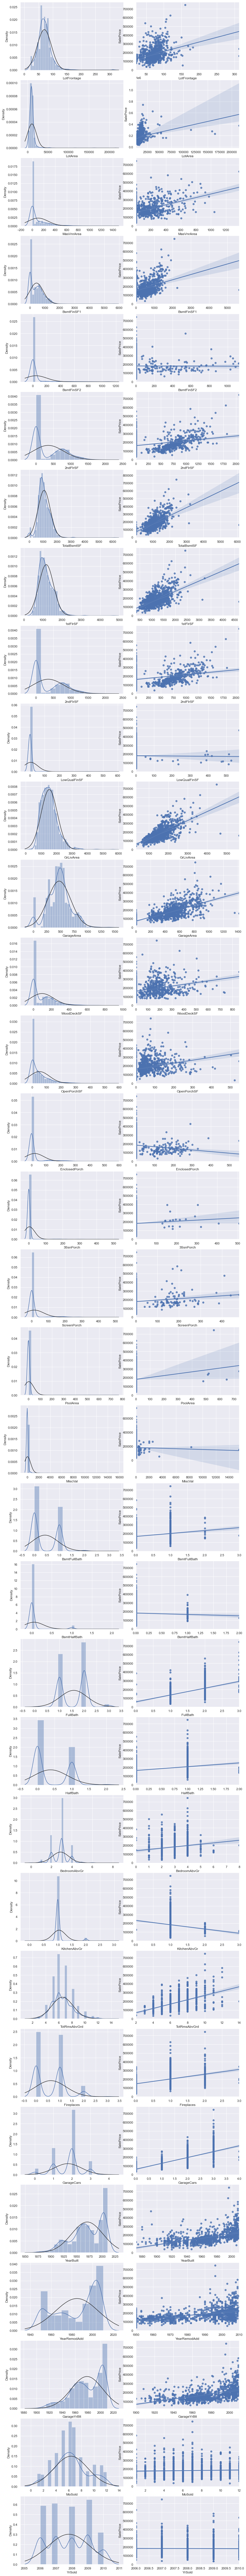

In [64]:
plot_quantitative(quantitative, train)

É possível notar que algumas variáveis tem pouca variabilidade nos dados, como PoolArea, ScreenPorch, etc. São variáveis relacionadas a piscina e varanda. Essas variaveis não são úteis para o modelo de regressão.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_filter = VarianceThreshold(threshold = 0.1)
print(train[quantitative].shape[1])
var_filter.fit(train[quantitative])

In [ ]:
poor_variability = np.array([True if x not in train[quantitative].columns[var_filter.get_support()]
                             else False
                             for x in train[quantitative].columns 
                             ])

In [ ]:
poor_variability

In [ ]:
# Variables to Keep
new_quantitative = quantitative[~poor_variability]
new_quantitative

In [ ]:
missing = train[new_quantitative].isna().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
missing

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(train[new_quantitative], train['SalePrice'])

In [ ]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

In [ ]:
def plot_qualitative(feature_list, df, single_plot_w=1.5 * 3.8, single_plot_h=3.8):
    m, n = len(feature_list), 2
    fig, ax = plt.subplots(m, n, figsize=(n * single_plot_w, m * single_plot_h))
    for i, feature in enumerate(feature_list):
        g = sns.countplot(df[feature], ax=ax[i][0])
        g = sns.boxplot(x=df[feature], y=df['SalePrice'], ax=ax[i][1])       
        g.set_yticklabels(['{:,.0f}'.format(y) + 'K' for y in g.get_yticks()/1000])

In [ ]:
plot_qualitative(qualitative, train)

## Missing Values

Percentage of missing values from the entire number of samples

In [ ]:
for column in missing.index:
    data = train.copy()
    samples = np.where(data[column].isna(), 'MISSING', 'OK')
    data[column] = samples
    data.groupby(column)['SalePrice'].median().plot.bar()
    plt.title(column)
    plt.show()

In [ ]:
train[missing[4:].index]

In [ ]:
quantitative = train.dtypes[train.dtypes != 'object'].index

In [ ]:
pd.melt(train, value_vars=quantitative)

In [ ]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [ ]:
df_num.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);